# SIR version 02.01

## El modelo epidémico de SIR

https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

- S( t) son aquellos susceptibles pero aún no infectados con la enfermedad;
- I( t) es la cantidad de individuos infecciosos;
- R( t) son aquellos individuos que se han recuperado de la enfermedad y ahora tienen inmunidad contra ella.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros, $\beta$ y $\gamma$. 

$\beta$ describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con otros $\beta \cdot N$ individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es $S/N$) $\gamma$ es la tasa de recuperación media: es decir, $\frac{1}{\gamma}$ es el período de tiempo promedio durante el cual un individuo infectado puede transmitirlo.
Además hemos incluido el caso de decesos, los que representamos con el factor $\mu$.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

$$\frac{dS}{dt}=−\beta \cdot \frac{S \cdot I}{N}$$

$$ \frac{dI}{dt} =\beta \cdot \frac{S\cdot I}{N}−\gamma \cdot I - \mu \cdot I$$ 

$$\frac{dR}{dt} = \gamma \cdot I $$

$$\frac{dr}{dt} = \mu \cdot I $$


El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros β= 0.2, 1/γ = 10 [dias] en una población de N = 1000 (quizás 'gripe en una escuela). 

El modelo se inicia con una sola persona infectada el día 0: I( 0 ) = 1. 

Las curvas trazadas de S(t), I(t) y R(t) están diseñados para ver los resultados obtenidos.

In [1]:
import numpy as np
#from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Una cuadrícula de puntos de tiempo (en días).
tini = 0
tfin = 160
t = np.linspace(tini, tfin, tfin+1)

In [3]:
# Las ecuaciones diferenciales del modelo SIR.
def SIR(t, y, N, alfa, days, beta, gamma, mu):
    S, I, R, r = y
    if (t < days):
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - mu * I
    else:
        dSdt = -alfa * beta * S * I / N
        dIdt =  alfa * beta * S * I / N - gamma * I - mu * I
        
#    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    drdt = mu * I
    return dSdt, dIdt, dRdt, drdt

In [4]:
# Datos reales obtenidos de https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/
# El dia uno (1) de las mediciones corresponde al 3 de marzo.
dia = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26, 27, 28, 29])
med = np.array([1, 1, 1, 2, 9, 12, 12, 17, 19, 31, 34, 45, 56, 65, 65,
79, 97, 128, 158, 225, 266, 301, 387, 502, 589, 690, 745, 820, 966])
dead = np.array([0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,4,4,4,6,8,12,17, 19, 20, 24])

In [5]:
# Población total, N.
N = 5000
# Número inicial de individuos infectados, recuperados y fallecidos, I0, R0 y r0.
I0, R0, r0 = 1, 0, 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0 - r0

In [6]:
# alfa: factor de incremento por abandono de cuarentena
# days: hito en días del abandono de la cuarentena
# beta: tasa media de contacto, 
# gamma (en 1/dias): tasa media de recuperación.
# mu: tasa media de decesos    # 0.28
alfa, days, beta, gamma, mu = 0.0, 100, 0.33, (1./14.0), 0.006 # 0.335

In [7]:
y0 = S0, I0, R0, r0
ret = solve_ivp(SIR, [tini, tfin], y0, args=(N, alfa, days, beta, gamma, mu), dense_output=True)

In [8]:
res = np.array(ret.sol(t))
S, I, R, r = res

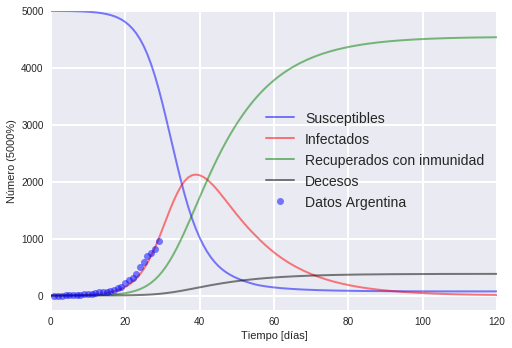

In [9]:

# Trace los datos en tres curvas separadas para S(t), I(t) y R(t)
with plt.style.context('seaborn'):
    plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptibles')
    plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
    plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados con inmunidad')
    plt.plot(t, r, 'k', alpha=0.5, lw=2, label='Decesos')
    plt.plot(dia, med, 'bo', alpha=0.5, lw=2, label='Datos Argentina')   
    plt.xlabel('Tiempo [días]')
    plt.ylabel('Número ('+str(N)+'%)')
    plt.ylim(-N/20,N) #/ 30
    plt.xlim(0, 120)
    plt.grid(b=True, which='major', c='w', lw=2, ls='-')
    plt.legend(prop={'size': 14}, shadow=True)
    plt.show()

In [39]:
print(I[37])
print(I[38])
print(I[39])
print(I[40])
print(I[41])

2076.5882285835264
2113.27515967171
2124.515168708491
2113.748626437823
2084.240598321706


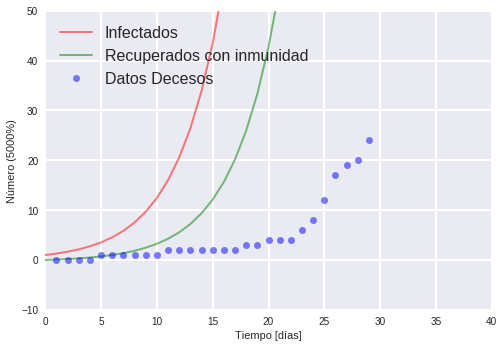

In [15]:

# Trace los datos en tres curvas separadas para S(t), I(t) y R(t)
with plt.style.context('seaborn'):
#    plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptibles')
    plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
    plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados con inmunidad')
#    plt.plot(t, r, 'k', alpha=0.5, lw=2, label='Decesos')
    plt.plot(dia, dead, 'bo', alpha=0.5, lw=2, label='Datos Decesos')   
    plt.xlabel('Tiempo [días]')
    plt.ylabel('Número ('+str(N)+'%)')
    plt.ylim(-N/500,N/100) #/ 30
    plt.xlim(0, 40)
    plt.grid(b=True, which='major', c='w', lw=2, ls='-')
    plt.legend(loc= 'upper left', prop={'size': 16})
#    legend.get_frame().set_alpha(0.5)
    plt.show()

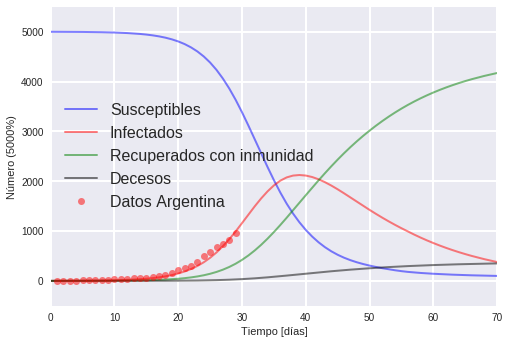

In [41]:
# Trace los datos en tres curvas separadas para S(t), I(t) y R(t)
with plt.style.context('seaborn'):
    plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptibles')
    plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
    plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados con inmunidad')
    plt.plot(t, r, 'k', alpha=0.5, lw=2, label='Decesos')
    plt.plot(dia, med, 'ro', alpha=0.5, lw=2, label='Datos Argentina')   
    plt.xlabel('Tiempo [días]')
    plt.ylabel('Número ('+str(N)+'%)')
    plt.ylim(-N/10,N*1.1)
    plt.xlim(0, 70)
    plt.grid(b=True, which='major', c='w', lw=2, ls='-')
    plt.legend(loc= 'center left', prop={'size': 16})
#    legend.get_frame().set_alpha(0.5)
    plt.show()

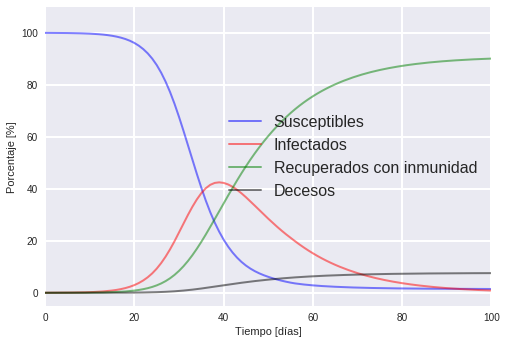

In [18]:
# Trace los datos en tres curvas separadas para S(t), I(t) y R(t)
with plt.style.context('seaborn'):
    plt.plot(t, S/N*100, 'b', alpha=0.5, lw=2, label='Susceptibles')
    plt.plot(t, I/N*100, 'r', alpha=0.5, lw=2, label='Infectados')
    plt.plot(t, R/N*100, 'g', alpha=0.5, lw=2, label='Recuperados con inmunidad')
    plt.plot(t, r/N*100, 'k', alpha=0.5, lw=2, label='Decesos')
    plt.xlabel('Tiempo [días]')
    plt.ylabel('Porcentaje [%]')
    plt.ylim(-5,110)
    plt.xlim(0, 100)
    plt.grid(b=True, which='major', c='w', lw=2, ls='-')
    plt.legend(loc= 'center right', prop={'size': 16})
#    legend.get_frame().set_alpha(0.5)
    plt.show()

In [ ]:
#print(R[10]*45)
#print(r[10]*45)
print(I[20]/N*100)
print(I[39]/N*100)
print(I[40]/N*100)
print(I[41]/N*100)
print(I[42]/N*100)
print('Pico 26 :', I[26])
print('Pico 27 :', I[27])
print('Picos máximo :',I[41])
print('Decesos :', r[120])
print('Decesos :', r[20])
print('Decesos :', r[22])
print('Decesos :', r[24])
print('Decesos :', r[26])